# Capstone Project

### Data Visualization

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#Read in 'twitter_df'
twitter_df = pd.read_csv("../dataset/twitter_df.csv")

In [3]:
#Check shape
twitter_df.shape

(22153, 8)

In [4]:
#Check data types
twitter_df.dtypes

Unnamed: 0                int64
tweet_id                  int64
tweet_posted_on          object
tweets                   object
cleaned_tweets           object
user_location            object
user_location_cleaned    object
polarity                  int64
dtype: object

In [5]:
#Drop Unnamed: 0 column
twitter_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
#Display first five rows
twitter_df.head()

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity
0,1416181616846811137,2021-07-16 23:43:03+00:00,🏡 #RemoteWork is on the rise &amp; slowly beco...,rise slowly becoming normal mean need remote t...,"New York, NY",US,1
1,1416181380279635970,2021-07-16 23:42:07+00:00,Opportunity to join a fantastic team at a hi-t...,opportunity join fantastic team tech fast pace...,London | New York,US,1
2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open excellent report remote advert ...,Sydney | Hong Kong | Singapore,HK,1
3,1416180635903868934,2021-07-16 23:39:09+00:00,Four Ways to Energize a Post-Pandemic Workforc...,four way energize post pandemic workforce,"Chicago, IL",US,1
4,1416180231350759425,2021-07-16 23:37:33+00:00,🚑 These are the tools that will save your #Rem...,tool save google meet tool created love want know,"Duluth, GA",US,0


In [7]:
#Check missing values
twitter_df.isnull().sum()

tweet_id                  0
tweet_posted_on           0
tweets                    0
cleaned_tweets           97
user_location             1
user_location_cleaned     1
polarity                  0
dtype: int64

In [8]:
#Check where 'cleaned_tweets' are missing
np.where(twitter_df['cleaned_tweets'].isnull() == True)

(array([  321,  2151,  2152,  2282,  2880,  3264,  3308,  3317,  3341,
         3353,  3404,  3405,  3411,  3413,  3417,  4017,  4018,  5236,
         5495,  5820,  5824,  5830,  5924,  5929,  5969,  5997,  6002,
         6118,  6307,  6308,  6497,  6797,  6889,  7110,  7608,  7734,
         8005,  9653,  9864,  9869,  9978, 10262, 10474, 10596, 11381,
        11404, 11423, 11469, 11603, 11625, 11845, 12060, 12182, 12255,
        12452, 13109, 13164, 13949, 13950, 14594, 15122, 15127, 15130,
        15168, 15322, 15374, 15667, 15680, 15808, 15918, 15969, 16030,
        16303, 16333, 16352, 16627, 16956, 16998, 17216, 17225, 17279,
        17720, 18110, 18299, 18379, 18416, 18507, 18783, 19135, 19452,
        19515, 20064, 20438, 20514, 20737, 21659, 21726]),)

In [9]:
#Drop missing rows and check shape
twitter_df = twitter_df.dropna().reset_index(drop=True)
# twitter_df.reset_index(drop=True)
twitter_df.shape

(22054, 7)

In [10]:
#Number of tweets that were retweeted
Retweets = twitter_df[twitter_df['tweets'].str.contains('RT')]
Retweets['tweets'].count()

7571

In [11]:
#Number of original tweets 
originaltweets = twitter_df[~twitter_df['tweets'].str.contains('RT')]
originaltweets['tweets'].count()

14483

In [12]:
#Display the most retweeted tweets
twitter_df['tweets'].value_counts().sort_values(ascending=False).head(15)

RT @Linda_U_W_A: Uniquely Your Designs: Starting your Business, Basics - https://t.co/5lihLHdUtn  Find out the basics #Smallbiz #workfromho…         175
RT @Lost_Tribe: The last few hours before #FreeDumbDay are ticking away.  For those vulnerable, it is anything but #Freedom with the #COVID…         153
RT @CoolMustHaves: Debunking Blogging Myths Part 2 - Affiliate Working Online - https://t.co/Pzbld10nUM 2nd part of debunking blogging myth…          61
RT @RaniNaamani: The “Work From Home” Walk... 🩴 #animation #walk #comedy #WorkFromHome https://t.co/fPBy3cKxEA                                        58
RT @stratorob: Innovation is the ability to see change as an opportunity - not a threat.\n\n#Business #ThinkBigSundayWithMarsha #Insurtech #F…        52
RT @vmoorthynow: @rehanna83 The world is fast turning into a zombie pool specially #WorkFromHome spaces. People offer lip service - ask of…           48
RT @stratorob: Your work is going to fill a large part of your life, and the only 

In [13]:
twitter_df['tweet_posted_on'] = pd.to_datetime(twitter_df['tweet_posted_on'])
twitter_df['week_day'] = twitter_df['tweet_posted_on'].dt.day_name()

In [14]:
twitter_df['week_day'][twitter_df['user_location_cleaned']=='IN'].value_counts()

Monday       390
Friday       335
Sunday       333
Thursday     318
Tuesday      304
Wednesday    291
Saturday     267
Name: week_day, dtype: int64

In [15]:
# week day analysis
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weeks_df = twitter_df.groupby(['week_day']).count().reindex(cats) 
weeks_df = weeks_df[['tweets']]
weeks_df

,tweets
week_day,
Monday,4062
Tuesday,3086
Wednesday,3356
Thursday,3214
Friday,3015
Saturday,2186
Sunday,3135


Text(0, 0.5, 'Number of tweets')

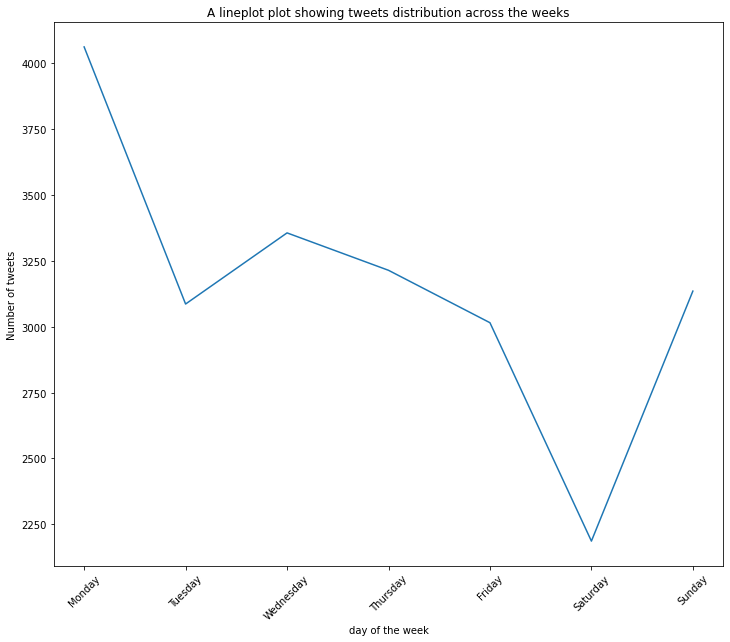

In [16]:
# now lets see some of the busy days of the week.
weeks_df['day'] = weeks_df.index
plt.figure(figsize=(12,10))
sns.lineplot(x = weeks_df.day, y = weeks_df.tweets)
plt.title('A lineplot plot showing tweets distribution across the weeks')
plt.xticks(rotation=45)
plt.xlabel('day of the week')
plt.ylabel('Number of tweets')

-  Lowest tweeting activity on Saturday, then the frequency increases slowly upto Monday where the max is recorded

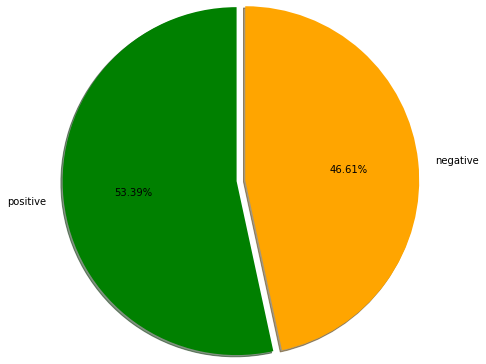

In [17]:
#Credit to https://stackoverflow.com/questions/39969089/how-to-create-pie-chart
#Credit to https://stackoverflow.com/questions/19852215/how-to-add-a-legend-to-matplotlib-pie-chart
label = ['positive','negative']
colors = ['green', 'orange'] 
plt.pie(twitter_df['polarity'].value_counts(),labels=label,colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), autopct = '%1.2f%%',radius=2) 
plt.show()

- Looks like more number of people are willing to work from home but interesting thing is there is just 2% difference between both

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


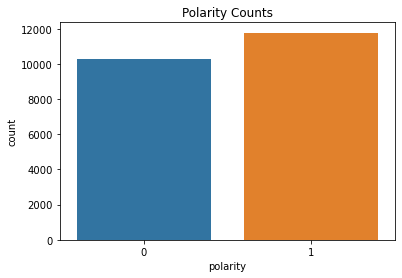

In [18]:
#Credit to https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
# Visualize the polarity counts
sns.countplot(twitter_df["polarity"])
plt.title("Polarity Counts")
plt.show()

- Similar to above graph , but just to get an idea of the number of tweets , more number of people tweeted positively about work from home

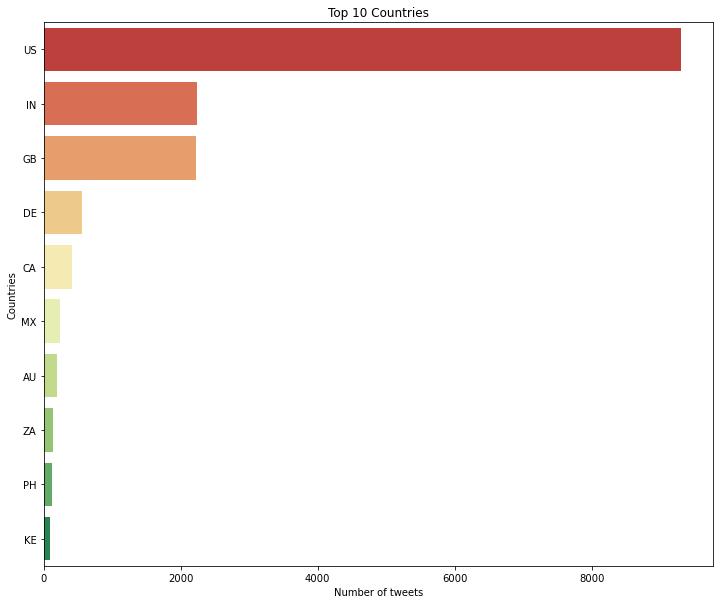

In [19]:
# Exclude unknown countries
countries_list = twitter_df[twitter_df.user_location_cleaned!='None']
# Select the top 10 countries
top_countries_list = countries_list["user_location_cleaned"].value_counts(sort=True).head(10)
# Visualize the top 10 countries
plt.figure(figsize=(12,10))
sns.barplot(y=top_countries_list.index,x=top_countries_list, orient="h", palette="RdYlGn")
plt.xlabel("Number of tweets")
plt.ylabel("Countries")
plt.title("Top 10 Countries")
plt.show()

- People from US tweeted most using these hashtags this is no surprise since Twitter is originally launched in the US, the largest number of users also happens to be from their country of origin
- After US , people from India tweeted most.According to stats,In Asia, Japan and India are leading the way with the largest number of Twitter. Combined, they’re already bigger than Twitter’s entire US audience.

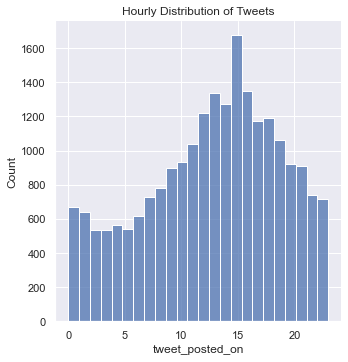

In [20]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
# Set the seaborn style
sns.set()
#converting 'date' column to a datetime datatype
twitter_df['tweet_posted_on'] = pd.to_datetime(twitter_df['tweet_posted_on'])
# Plot the histogram of hours
sns.displot(twitter_df["tweet_posted_on"].dt.hour, bins=24,kde=False)
plt.title("Hourly Distribution of Tweets")
plt.show()

In [21]:
#Convert 'tweet_posted_on' datatype from object to datetime format
twitter_df['date'] = pd.to_datetime(twitter_df['tweet_posted_on']).dt.date

Text(0.5, 1.0, 'Tweets polarity on each day')

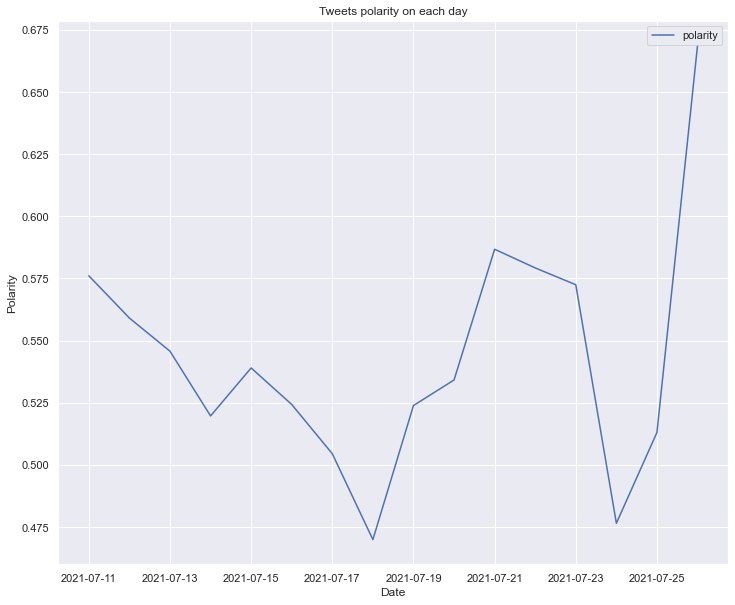

In [22]:
#Visualize the polarity of tweets each day
plt.figure(figsize=(12,10))
twitter_df.groupby(by='date')['polarity'].mean().plot(legend=True)
plt.xlabel("Date")
plt.ylabel("Polarity")
plt.title("Tweets polarity on each day")

In [23]:
# # Create our contextual stop words
# stops = ["online", "home", "remote", "work", "working","pandemic","business", \
#                "internet", "remotework", "online","team","office","company","hybrid","employee","looking"]

<Figure size 3600x2400 with 0 Axes>

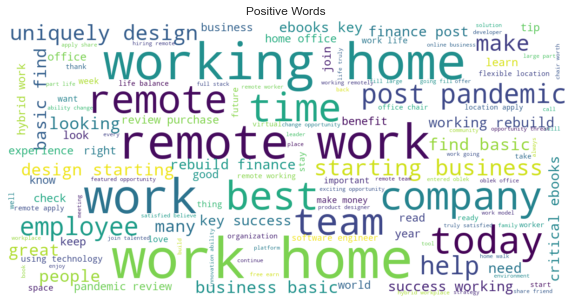

In [24]:
#https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
positive_words =' '.join([word for word in twitter_df['cleaned_tweets'][twitter_df['polarity'] == 1]])
wordcloud = WordCloud( background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Positive Words")
plt.show()

<Figure size 3600x2400 with 0 Axes>

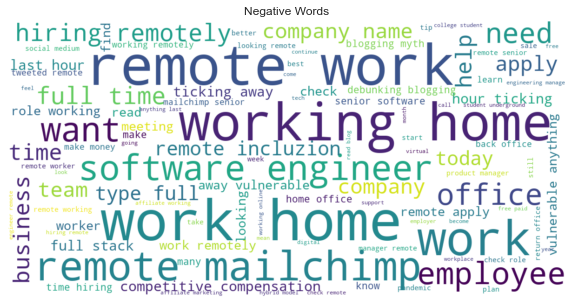

In [25]:
negative_words =' '.join([text for text in twitter_df['cleaned_tweets'][twitter_df['polarity'] == 0]])
wordcloud = WordCloud( background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(negative_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Negative Words")
plt.show()

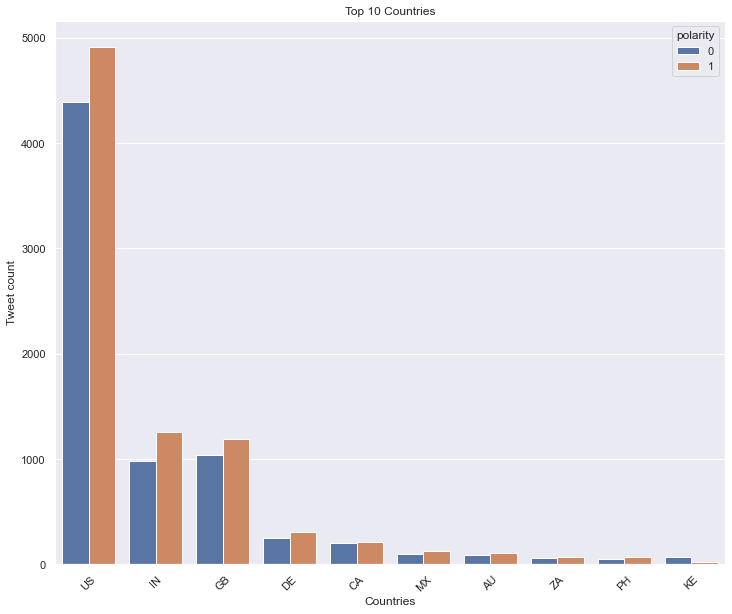

In [26]:
# Create a mask for top 1 countries (by tweets count)
mask = twitter_df["user_location_cleaned"].isin(top_countries_list.index[:10]).values

# Create a new DataFrame only includes top10 country
top_10 = twitter_df.iloc[mask,:]

# Visualize the top 20 countries
plt.figure(figsize=(12,10))
sns.countplot(x="user_location_cleaned", hue="polarity", data=top_10, order=top_10["user_location_cleaned"].value_counts().index)
plt.xlabel("Countries")
locs, labels = plt.xticks()
plt.xticks(locs, top_countries_list.index)
plt.xticks(rotation=45)
plt.ylabel("Tweet count")
plt.title("Top 10 Countries")
plt.show()

In [27]:
def list_hashtag(tweet):
    prob = tweet.replace("#remotework","")
    prob = prob.replace("#workfromhome","")
    prob = prob.replace("#WorkFromHome","")
    prob = prob.replace("#RemoteWork","")
    prob = prob.replace("#wfh","")
    prob = prob.replace("#WFH","")
    prob = prob.replace("#Hiring","")
    prob = prob.replace("#workathome","")
    prob = prob.replace("#remotejob","")
    prob = prob.replace("#remote","")
    prob = prob.replace("#jobs","")
    prob = prob.replace("#job","")
    prob = prob.replace("#work","")
    prob = prob.replace("#JobHunt","")
    prob = prob.replace("#okjob","")
    prob = prob.replace("#NowHiring","")
    return prob

In [28]:
#https://stackoverflow.com/questions/50582305/extract-and-count-unique-hashtags-per-row-from-a-pandas-dataframe
prob_1 = twitter_df['tweets'].map(list_hashtag).str.extractall(r'(\#\w+)').reset_index(level=0).drop_duplicates()[0]

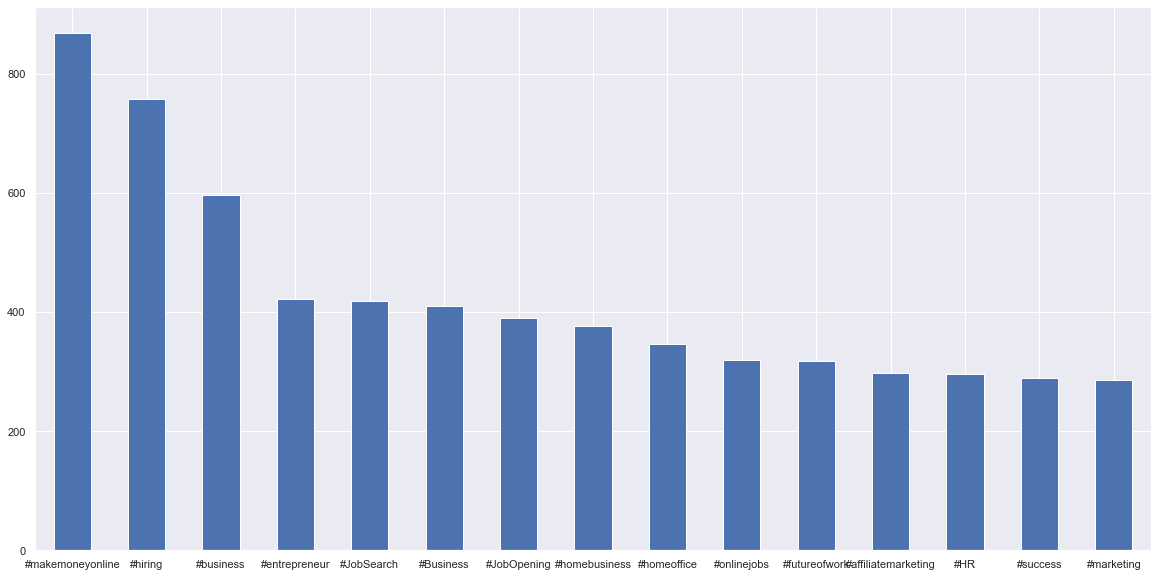

In [29]:
#visualize most frequent hashtags
plt.figure(figsize=(20,10))
prob_1.value_counts(sort=True).head(15).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<Figure size 3600x2400 with 0 Axes>

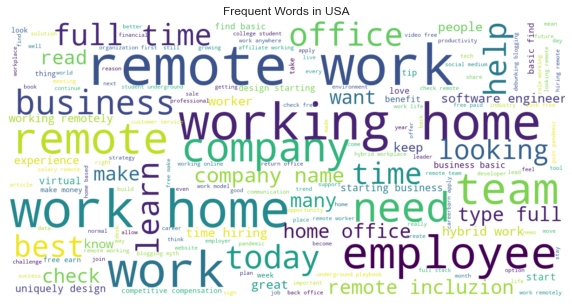

In [34]:
frequent_words_usa =' '.join([text for text in twitter_df['cleaned_tweets'][twitter_df['user_location_cleaned']=='US']])
wordcloud = WordCloud( background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(frequent_words_usa)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Frequent Words in USA")
plt.show()

<Figure size 3600x2400 with 0 Axes>

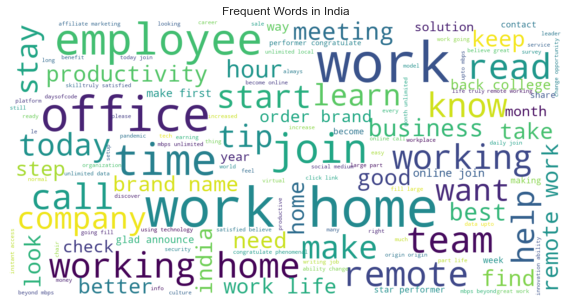

In [35]:
frequent_words_in =' '.join([text for text in twitter_df['cleaned_tweets'][twitter_df['user_location_cleaned']=='IN']])
wordcloud = WordCloud( background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(frequent_words_in)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Frequent Words in India")
plt.show()

<Figure size 3600x2400 with 0 Axes>

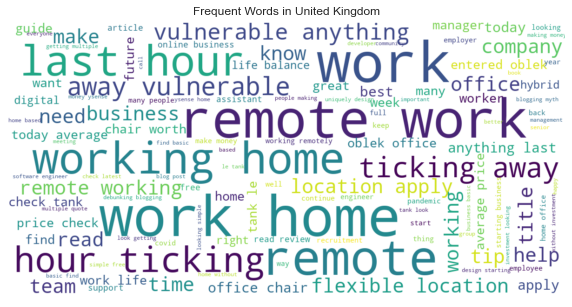

In [36]:
frequent_words_uk =' '.join([text for text in twitter_df['cleaned_tweets'][twitter_df['user_location_cleaned']=='GB']])
wordcloud = WordCloud( background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(frequent_words_uk)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Frequent Words in United Kingdom")
plt.show()